> # Recognising Handwritten Digits on MNIST DataSet using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist =pd.read_csv("./input/digit-recognizer/train.csv")

In [4]:
mnist
#(rows,cols)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist.columns
#so it represent that first column is label and rest are pixel of label
#in this data image of 28x28 is stored in format of 784 array of pixels

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
mnist.head()
#label isalways y
#and we have 784 pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X= mnist.iloc[: ,1:].values #bcz we are accessing integer val # #we can also do like mnist[:,1:]
# accesing number instead of categorical data
y=mnist["label"].values #we can also do like mnist[:,0]
#here we have used .numpy to convert it into numpy array

In [8]:
X.shape

(42000, 784)

In [9]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [10]:
y.shape

(42000,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#this just for splitting train and test

In [13]:

X_train.shape

(33600, 784)

In [14]:
y_train.shape

(33600,)

In [15]:
X_test.shape

(8400, 784)

In [16]:
y_test.shape

(8400,)

In [17]:
#we can apply kNN on this 

In [18]:
def plot_image_color(img):
    img=img.reshape((28,28))
    plt.imshow(img) #this function gives u acolor map 
    plt.show()

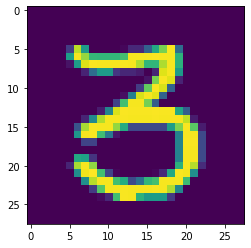

In [19]:
plot_image_color(X_train[60])


In [20]:
def plot_image(img):
    plt.imshow(img.reshape(28,28) ,cmap="gray") #this function gives u acolor map 
    #imshow just plot img and in img u will get (1,784)
    
    #so converting 784 into 28x28  
    plt.show()
    #as the img is graay scale so if we dont put cmap it 
    #automatically put so some color imshow ()
    

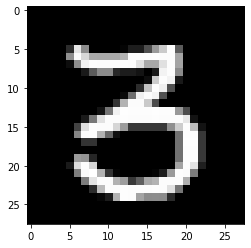

3


In [21]:
plot_image(X_train[60]) #you can try this out on different image 
print(y_train[60])
#here training timeis o(1) bcz everything is going to happen in prediction time
# and their is no training time

# kNN

In [22]:
def distance(pA, pB):
    return np.sum((pB - pA)**2)**0.5

In [23]:
def kNN(X, y, x_query, k = 5):
    """
    X - > (m, 784)  np array (m is just number of eg. images)
    y - > (m,) np array
    x_query -> (1,874) np array
    k -> scaler  int
    
    do knn for classification
    """
    
    m = X.shape[0]
    distances = []
    for i in range(m):
        dis = distance(x_query, X[i])
        distances.append((dis, y[i]))
        
    distances = sorted(distances)
    distances = distances[:k]
    
    distances = np.array(distances)
    labels = distances[:, 1]
    
    
    uniq_label, counts = np.unique(labels, return_counts=True)

    pred = uniq_label[counts.argmax()]
    
    
    return int(pred)

# What algorithm is predicting

In [24]:
# prediciting label for test
kNN(X_train , y_train, X_test[235], k=7)
#X_test if for testing

4

# what we are getting image as output

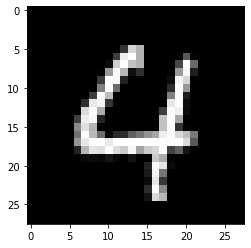

In [25]:
# displaying test image
plot_image(X_test[235])

In [26]:
# actual label
y_test[235]
#this for checking that is X_train ==y_train

4

# accuracy of Knn over test set

# Prediciting 100 Images

In [27]:
predictions = []
for i in range(100):
    p = kNN(X_train , y_train, X_test[i], k=7)
    predictions.append(p)

In [28]:
predictions = np.array(predictions)
predictions.dtype

dtype('int32')

# Accuracy on 100 Images

In [29]:
p=(y_test[:100] == predictions)
type(p)

numpy.ndarray

In [30]:
(y_test[:100] == predictions).sum()/len(predictions) #or 100

0.99

In [31]:
predictions

array([2, 2, 5, 4, 7, 6, 5, 1, 5, 3, 9, 4, 5, 3, 3, 9, 4, 8, 5, 2, 7, 9,
       2, 0, 7, 4, 6, 3, 1, 8, 8, 1, 6, 4, 1, 3, 4, 8, 7, 2, 8, 0, 3, 1,
       9, 3, 1, 4, 6, 6, 4, 3, 2, 9, 3, 2, 0, 7, 4, 9, 7, 1, 9, 7, 3, 6,
       6, 8, 7, 3, 1, 9, 7, 8, 7, 6, 4, 0, 1, 6, 8, 7, 6, 5, 9, 4, 7, 4,
       9, 8, 2, 0, 8, 7, 2, 9, 3, 5, 4, 7])

# KNN From sklearn

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=7)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
yp=[]
for i in range(100):
    p=knn.predict([X_test[i]])#here we have used it to convert it in 2D array
    p1=np.array(p)
    yp.append(p1)

In [36]:
yp=np.array(yp)

In [37]:
yp=yp.reshape((100,)) #this we have done bcz we have earlier converted
#our X_test into 2D array

print(yp.shape)

(100,)


In [38]:
(y_test[:100] == yp).sum()/len(yp) #or 100

0.99

Applying Another Approach 

In [40]:
import tensorflow.keras as tf 
mnist_train =pd.read_csv("./input/digit-recognizer/train.csv")
mnist_test =pd.read_csv("./input/digit-recognizer/test.csv")

In [43]:
df = pd.DataFrame(mnist_train)#.head(32000)
img= df.drop(["label"], axis=1).values
y= df["label"].values

img = img.reshape(42000, 28, 28, 1)

In [44]:
img.shape

(42000, 28, 28, 1)

In [46]:
model = tf.models.Sequential()
model.add(tf.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.layers.MaxPooling2D((2, 2)))
model.add(tf.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.layers.MaxPooling2D((2, 2)))

model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(64, activation='relu'))
model.add(tf.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


res = model.fit(img, y, epochs=15, validation_split=0.3)


Epoch 1/15
919/919 [==============================] - 86s 93ms/step - loss: 0.5806 - accuracy: 0.8853 - val_loss: 0.1245 - val_accuracy: 0.9629
Epoch 2/15
919/919 [==============================] - 88s 96ms/step - loss: 0.0887 - accuracy: 0.9733 - val_loss: 0.0970 - val_accuracy: 0.9714
Epoch 3/15
919/919 [==============================] - 88s 96ms/step - loss: 0.0601 - accuracy: 0.9826 - val_loss: 0.0615 - val_accuracy: 0.9833
Epoch 4/15
919/919 [==============================] - 90s 98ms/step - loss: 0.0519 - accuracy: 0.9841 - val_loss: 0.0715 - val_accuracy: 0.9812
Epoch 5/15
919/919 [==============================] - 88s 96ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0713 - val_accuracy: 0.9824
Epoch 6/15
919/919 [==============================] - 88s 96ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 7/15
919/919 [==============================] - 88s 95ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0836 - val_accuracy:

In [47]:
df_t=pd.DataFrame(mnist_test)
img= df_t.values

img= img.reshape(28000, 28, 28, 1)
prediction = np.argmax(model.predict(img), axis=1)

In [48]:
# dfinal=pd.DataFrame(data=prediction,columns=["Label"])
#dfinal
sample_submission = pd.read_csv("sample_submission.csv")
dfinal= sample_submission.drop(["Label"], axis=1) 
dfinal.insert(1,'Label',prediction)

In [49]:
dfinal.to_csv("./Recog_MNIST.csv",index=False)